# Project: Investigate Suicide Research Dataset

# Table of Contents
    1.Introduction
    2.Data Wrangling
    3.Exploratory Data Analysis
    4.Machine Learning + Predictive Analytics 
    5.Conclusions
    6.References

# 1. Introduction

From growing up in the heart of Silicon Valley, I have always wondered what was the factors that play a role in Suicide. There have been a plethora of suicide clusters from my High School in Palo Alto. This project seeks to explore the underlying factors. We will use a sample of 44,000 gather data from 141 different Countries, between the 80's to 2016.



"Suicide is one of the leading causes of death among all American adults and rates are increasing in both men and women"(SSM Health).

# Research Questions




  1. Which year has the most suicides ? 
   Which year has the least suicides ? 
   
   
  2. Which country has the most suicides ? 
   Which country has the least suicides ? 
   

3. Are certain age groups more inclined to suicide?


4. What is the relationship between gender and the number of suicides? 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('/Users/jarar_zaidi/Desktop/ML Projects/Practice Excel/who_suicide_statistics.csv')

Our dataset has 4 Features (Country, Year, Sex, and Age). We will explore all of these in detail. While the suicide_no is what we would like to predict (we will do this in Section 4 - Machine Learning + Predictive Analytics ).

# 2. Data Wrangling

note: we will peform more data wrangling outside this section. 

Lets start with getting basic infomation about our Data Set

In [2]:
# look at 1st 5 data points
data.head(5)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [3]:
data.info()# print the concise summery of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [4]:
data.shape # 43776 Rows, 6 Columns

(43776, 6)

In [5]:
# counts total row in each col. that have null values
# note: all the na columns are type Object
data.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [6]:
# From above, we can see that, suicides_no & population, have null values.
#Lets, fill the null values with zero using 'fillna'
data= data.fillna(0)
# Now, we have no null columns!
data.isna().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [7]:
# The different age groups
data['age'].unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [8]:
# lists the different countries
data['country'].unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [9]:
# the Number of different Countries our dataset is from
data['country'].nunique()
# Our dataset is from 141 different Countries

141

In [10]:
# The different country groups
data['year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 1983, 1984,
       2016, 1979, 1980, 1981, 1982])

In [11]:
# Replace 0 values with, NA
data['suicides_no'] = data['suicides_no'].replace(0,np.NAN)

# replace Na values with, mean value
mean_value=data['population'].mean()

data['population']=data['population'].fillna(mean_value)

In [12]:
# do same for Popualation
# replace Na values with, mean value
mean_value=data['suicides_no'].mean()

data['suicides_no']=data['suicides_no'].fillna(mean_value)

# ---------------------------------------------------------------------------------------------

# 3. Exploratory Data Analysis

# Research Question 1: Which year has the most Suicides ? Which year has the least Suicides ?

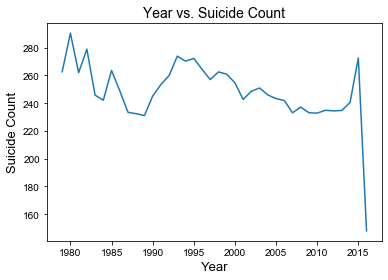

In [13]:
# year-wise analysis of mean number sucidies of each year
            # x             #y
data.groupby('year')['suicides_no'].mean().plot()

#setup the title and labels of the figure.
plt.title("Year vs. Suicide Count",fontsize = 14)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Suicide Count',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

From observing our Time Series Line Plot, we can see a sharp drop in suicides in 1985. This decrease could be due to awareness of suicide & mental health in the 80s, as well as improved recogniztion of those at risk. This is indeed accurate, as the research,"Suicide in the elderly" supports this claim,

    "Female suicide rates have shown a similar overall decrease, reducing by between 45 and 60% during the years 1983–1995 in the 45–84 age group.

    -elderly women, however, retain the highest rates throughout the life span (1)
    -ratio of male to female elderly suicide deaths remains approximately 3:1
    
     These trends in suicide rates are probably due to:

    improved detection of those at risk
    aggressive treatment of mental illness in the elderly" (Suicide in the elderly, General Practice Notebook).
        



In [14]:
data['suicides_no'] = data['suicides_no'].replace(0,np.NAN)

mean_value=data['suicides_no'].mean()
data['suicides_no']=data['suicides_no'].fillna(mean_value)

def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    #print the Year with high and low suicide
    print("Year Which Has Highest "+ x + " : ",data['year'][high_index])
    print("Year Which Has Lowest "+ x + "  : ",data['year'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('suicides_no')

Year Which Has Highest suicides_no :  1994
Year Which Has Lowest suicides_no  :  1987


,33128,29
country,Russian Federation,Albania
year,1994,1987
sex,male,female
age,35-54 years,75+ years
suicides_no,22338,1
population,1.90442e+07,35600


This confirms, that 1987 had the lowest sucide number, while 1994 had the highest suicide number.

# ---------------------------------------------------------------------------------------------

# Research Question 2: Which country has the most Suicides ? Which country has the least Suicides ?

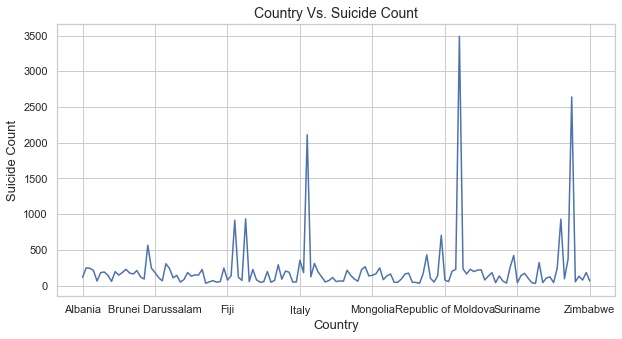

In [15]:
# year-wise analysis of mean number sucidies of each year
            # x             #y
data.groupby('country')['suicides_no'].mean().plot()

#info = pd.DataFrame(data['country'].sort_values(ascending = False))

#setup the title and labels of the figure.
plt.title("Country Vs. Suicide Count",fontsize = 14)
plt.xlabel('Country',fontsize = 13)
plt.ylabel('Suicide Count',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

In [16]:
def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    #print the country with high and low suicide
    print("Country Which Has Highest "+ x + " : ",data['country'][high_index])
    print("Country Which Has Lowest "+ x + "  : ",data['country'][min_index])
    return pd.concat([low,high],axis = 1)

find_minmax('suicides_no')

Country Which Has Highest suicides_no :  Russian Federation
Country Which Has Lowest suicides_no  :  Albania


,29,33128
country,Albania,Russian Federation
year,1987,1994
sex,female,male
age,75+ years,35-54 years
suicides_no,1,22338
population,35600,1.90442e+07


Lets make a new column to calculate the Suicide per Population Size Ratio, to better understand our data

In [17]:
#calculate mean of suicides_no col
meanSuicide = data['suicides_no'].mean()
#calculate mean of pop. col
meanPop = data['population'].mean()

#NOTE: You may replace NA values with mean, OR Drop them, I showed both
    
# drops any Na rows
data = data.dropna()    
    
# Replace 0 or NaN suicides_no, with the mean Suicide    
data['suicides_no'] = data['suicides_no'].replace(np.NAN,meanSuicide)

# Replace 0 or NaN populations, with the mean Populations
data['population'] = data['population'].replace(np.NAN,meanPop)
data['population'] = data['population'].replace(0,meanPop)

In [18]:

# peform operation
data['suicide_per_pop'] = data['suicides_no']/data['population']

        # another way of peforming the operation from above:
# data['suicide_per_pop'] = data.apply(lambda row: row.suicides_no / row.population, axis = 1) 

data.tail(3)

,country,year,sex,age,suicides_no,population,suicide_per_pop
43773,Zimbabwe,1990,male,5-14 years,6.0,1.456536e+06,0.000004
43774,Zimbabwe,1990,male,55-74 years,74.0,1.456536e+06,0.000051
43775,Zimbabwe,1990,male,75+ years,13.0,1.456536e+06,0.000009


In [19]:
find_minmax('suicide_per_pop')

Country Which Has Highest suicide_per_pop :  Rodrigues
Country Which Has Lowest suicide_per_pop  :  Egypt


,12993,32351
country,Egypt,Rodrigues
year,2005,2004
sex,male,male
age,5-14 years,75+ years
suicides_no,1,249.106
population,9.54309e+06,259
suicide_per_pop,1.04788e-07,0.9618


Both the graph & find_minmax funciton above, confirm that Albania had the lowest suicide count, while Zimbabwe & Russian Federation, 
had the largest suicide count. A reason the Russian Federations may have a large suicide count may be that they have a very large population (144.5 million, while Albania only has about 3 million). It has been reported that Russian levels of alcohol consumption plays an immense role in it's large suicide count, but their is a lack of data to support this due to Soviet secrecy.

From looking at the ratio's above, Rodrigues has the highest suicide per population ratio. 
While Egypt has the smallest ratio of Suicides per Population. 

# ---------------------------------------------------------------------------------------------

# Research Question 3: Are certain age groups more inclined to suicide?


In [20]:
sample = data.sample(3)

In [21]:
sample

,country,year,sex,age,suicides_no,population,suicide_per_pop
20384,Italy,2007,male,35-54 years,883.000000,8.888038e+06,0.000099
8180,Cayman Islands,1987,male,35-54 years,249.106328,1.456536e+06,0.000171
10428,Cuba,2005,female,15-24 years,36.000000,7.729430e+05,0.000047


In [22]:
 # grabs first 2 chars from Age Column
data['AgeNum'] = data['age'].str[:2]

# remove all instances of dash -
data['AgeNum'] = data['AgeNum'].map(lambda x: x.replace('-',''))

# now, convert it to type int (not Object)
data['AgeNum'] = data['AgeNum'].astype(int)

data['AgeNum'].tail(3)

43773     5
43774    55
43775    75
Name: AgeNum, dtype: int64

In [23]:
# creates Age Categories
def AgeGroup(x):
    if(x >= 60):
        return "Elderly"
    elif(x >= 30):
        return "Middle_Aged_Adults"
    elif(x >= 18):
        return "Adults"
    else:
        return "Adolescent"
# Map each row in the Col to the AgeGroup Method
data['AgeCategory'] = data['AgeNum'].map(lambda x: AgeGroup(x))
# convert it back to type String
data['AgeCategory'] = data['AgeCategory'].astype(str)
data['AgeCategory'].tail(3)

43773            Adolescent
43774    Middle_Aged_Adults
43775               Elderly
Name: AgeCategory, dtype: object

In [24]:
data['AgeNum'] .tail(3)

43773     5
43774    55
43775    75
Name: AgeNum, dtype: int64

In [25]:
data.head(3)

,country,year,sex,age,suicides_no,population,suicide_per_pop,AgeNum,AgeCategory
0,Albania,1985,female,15-24 years,249.106328,277900.0,0.000896,15,Adolescent
1,Albania,1985,female,25-34 years,249.106328,246800.0,0.001009,25,Adults
2,Albania,1985,female,35-54 years,249.106328,267500.0,0.000931,35,Middle_Aged_Adults


Text(5.960000000000001, 0.5, 'Suicide Count')

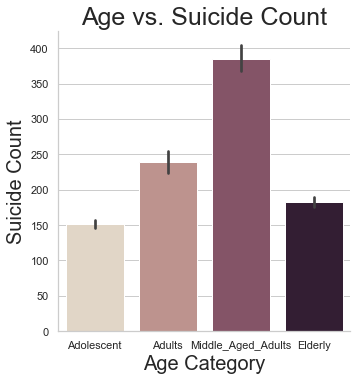

In [26]:
sns.catplot(x="AgeCategory", y="suicides_no",palette="ch:.25", kind="bar",data=data);

plt.title('Age vs. Suicide Count',size=25)
plt.xlabel('Age Category',size=20)
plt.ylabel('Suicide Count',size=20)

The data illustrates that middle aged adults, between the ages of 30 through 60, have the highest suicide count. While elderly and adolescents have about half the amount as  middle aged adults.

# ---------------------------------------------------------------------------------------------

# Research Question 4: What is the relationship between the gender and the number of suicides? 

Note: Hue, allows us to add another dimensionality to our analysis!

    "In 2017, men died by suicide 3.54 times more often than women"(SMM Health).

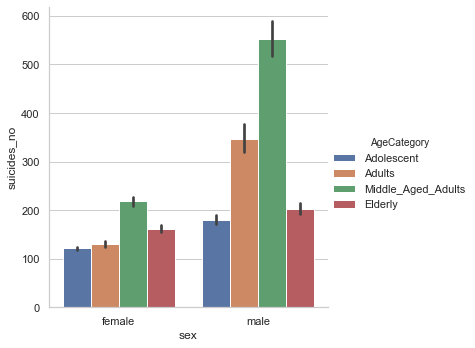

In [27]:
sns.catplot(x="sex", y="suicides_no", hue="AgeCategory", kind="bar", data=data);

In [28]:
# there is an equal number of Males & Females in our data
data['sex'].value_counts()

female    21888
male      21888
Name: sex, dtype: int64

Suicide is one of the leading causes of death among all Americans adults. Data show heightend differences in suicide for different sexes. It's evident that males are more inclined to suicide. For Females, the 4 age cateogries seem to level off at 150. We can't say the same for males. Male adults & male middle aged adults are at very high risk of suicide. Both genders show middle aged adults as the leading age group of suicide.

        "In 2017, men died by suicide 3.54 times more often than women. Middle-aged white men, in particular, are susceptible"(SMM Health).

# ---------------------------------------------------------------------------------------------

# 4. Machine Learning + Predictive Analytics 

Our goal in this section is to build a multiple linear regression model that will be trained to 
	understand correlation between our features and our predictor. 
	We want to predict Y (suicides count), given a a specific year, pertaining to a specfic age group & gender. 

In [29]:
data.head(3)

,country,year,sex,age,suicides_no,population,suicide_per_pop,AgeNum,AgeCategory
0,Albania,1985,female,15-24 years,249.106328,277900.0,0.000896,15,Adolescent
1,Albania,1985,female,25-34 years,249.106328,246800.0,0.001009,25,Adults
2,Albania,1985,female,35-54 years,249.106328,267500.0,0.000931,35,Middle_Aged_Adults


In [30]:
newData= data.loc[:,['year','sex','AgeNum','suicides_no']]
newData.head(3)

,year,sex,AgeNum,suicides_no
0,1985,female,15,249.106328
1,1985,female,25,249.106328
2,1985,female,35,249.106328


In [31]:
X = newData.iloc[:, :-1].values # grab the every col except last
y = newData.iloc[:, -1].values # grab last col

# Encoding categorical data¶

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [33]:
# the Gender feature, is now encoded using 0's & 1's
X

array([[1.0, 0.0, 1985, 15],
       [1.0, 0.0, 1985, 25],
       [1.0, 0.0, 1985, 35],
       ...,
       [0.0, 1.0, 1990, 5],
       [0.0, 1.0, 1990, 55],
       [0.0, 1.0, 1990, 75]], dtype=object)

In [34]:
y

array([249.10632817, 249.10632817, 249.10632817, ...,   6.        ,
        74.        ,  13.        ])

# Splitting the dataset into the Training set and Test set

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)  

In [36]:
print(x_train)

[[1.0 0.0 2000 25]
 [1.0 0.0 1989 75]
 [0.0 1.0 2009 5]
 ...
 [0.0 1.0 1979 35]
 [1.0 0.0 1991 55]
 [1.0 0.0 1984 5]]


In [37]:
print(x_test)

[[0.0 1.0 2003 5]
 [0.0 1.0 2010 55]
 [1.0 0.0 2002 25]
 ...
 [1.0 0.0 2012 25]
 [1.0 0.0 1995 75]
 [1.0 0.0 2010 75]]


In [38]:
print(y_train)

[ 17.          51.         249.10632817 ... 249.10632817   3.
 249.10632817]


In [39]:
print(y_test)

[ 11. 389.   9. ...  20.  37.  11.]


# Training the Multiple Linear Regression model on the Training set¶

In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the Test set results

In [82]:
# we are predicting the suicide count given certain demographics

# A 55 year old male, in 2001 
# suicide count of about 187.
print(regressor.predict([[1,0,2001,55]]))

[186.82]


# ---------------------------------------------------------------------------------------------

# 5. Conclusions

1. There was a decrease in suicides toward the 80's. This could be due to awareness of suicide & mental health in the 80s, as well as improved recogniztion of those at risk. But shortly after that their is a rise suicides that we are seeing.

2. Russian levels of alcohol consumption plays an immense role in it's large suicide count, but their is a lack of data to support this due to Soviet secrecy. 

3. The data illustrates that middle aged adults, between the ages of 30 through 60, have the highest suicide count. While elderly and adolescents have about half the amount as middle aged adults.

4. Suicide is one of the leading causes of death among all Americans adults. Data show alarming differences in suicide for different sexes. It's evident that males are more inclined to suicide, than females. In addition, Mental health  is a major predictor for suicide. 

# ---------------------------------------------------------------------------------------------

# 6. References


October 14, 2019 by SSM Health. “Why Are Middle-Aged White Men More Likely to Die by Suicide?” SSM Health, www.ssmhealth.com/blogs/ssm-health-matters/october-2019/middle-aged-men-more-likely-to-die-by-suicide. 

“Suicide in the Elderly.” Suicide in the Elderly - General Practice Notebook, gpnotebook.com/simplepage.cfm?ID=1711669253. 

# ---------------------------------------------------------------------------------------------

# Where to get help

Canada or US: If you're in an emergency, please call 911

You can contact the US National Suicide Prevention Lifeline on 1-800-273-8255 or the Crisis Test Line by texting HOME to 741741

Young people in need of help can call Kids Help Phone on 1-800-668-6868